In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('font',family='Times New Roman')
import seaborn as sns
sns.set_style('ticks')
sns.set_context(context='notebook')
import random
from deap import algorithms, base, creator, tools

E:\Anaconda\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [2]:
PATH = 'data/data_clean_Merah.csv'
TARGET = 'Karotenoid'
OUTPUT_PATH = 'output/'
CSFONT_LABEL = {'fontname':'Times New Roman', 'fontsize': 28}  # 36
CSFONT_TICKS = {'fontname':'Times New Roman', 'fontsize': 22}  # 26
CSFONT_R = {'fontname':'Times New Roman', 'fontsize': 20}  # 24

SPECTRAL_TICKS = ['400.28','450.16',
                '500.37','550.91',
                '601.78','650.29',
                '701.81','750.93',
                '800.34','850.06',
                '900.07', '950.38',
                '1000.99']
SPECTRAL_LABELS = ['400','450',
                    '500','550',
                    '600','650',
                    '700','750',
                    '800','850',
                    '900', '950',
                    '1000']
PERCENT_LABEL =['0','20','40','60','80','100']

In [4]:
def config_training(path, target):
    data = pd.read_csv(path)       
    y = data[target]
    x = data.drop([target], axis = 1)
    
    return x,y 

In [9]:
def log_to_df(log, filename): 
    log_df = pd.DataFrame()
    for records in log:
        temp_series = pd.Series([])
        for value in records:
            temp_series[value] = records[value]
        temp_df = pd.DataFrame(temp_series).transpose()
        log_df = pd.concat([log_df, temp_df], axis = 0, ignore_index=True)
    log_df.to_csv(OUTPUT_PATH+filename+'.csv')
    return log_df

In [10]:
def plot_log(log_df, title, y_label, filename):
    plt.figure(figsize=(10,5))
    # plt.title(title)
    plt.xlabel('Generasi', **CSFONT_LABEL)
    plt.ylabel(y_label, **CSFONT_LABEL)
    log_df['avg'].plot()
    plt.fill_between(log_df.index,  log_df['min'], log_df['max'],
                    color='b', alpha=0.1)
    plt.xticks(**CSFONT_TICKS)
    plt.yticks(**CSFONT_TICKS)
    plt.grid(linestyle='--')
    plt.savefig(OUTPUT_PATH+filename+'.svg',format='svg',bbox_inches = 'tight')
    plt.savefig(OUTPUT_PATH+filename+'.png',dpi=600,bbox_inches = 'tight')

In [11]:
PLS_COMP = 5

In [12]:
x, y = config_training(PATH, TARGET)

In [13]:
x

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,978.46,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81
0,0.812287,0.798150,0.760291,0.720369,0.669454,0.614688,0.556251,0.510394,0.465971,0.419227,...,0.969751,0.971080,0.973227,0.974930,0.974670,0.976515,0.978317,0.977836,0.978314,0.978604
1,0.791143,0.766676,0.734486,0.688715,0.640579,0.594057,0.540654,0.488306,0.447810,0.407799,...,0.953990,0.952884,0.954886,0.957283,0.958236,0.959532,0.961902,0.962694,0.964035,0.964064
2,0.794898,0.778036,0.741570,0.694348,0.639853,0.591597,0.545090,0.492827,0.454222,0.412026,...,0.931398,0.932815,0.934616,0.935395,0.936364,0.936550,0.938166,0.940420,0.941204,0.941430
3,0.832361,0.805275,0.772586,0.729501,0.669372,0.616552,0.565929,0.506243,0.465819,0.420677,...,0.935628,0.935977,0.937572,0.939095,0.940059,0.942817,0.943656,0.945308,0.946541,0.947179
4,0.796196,0.765254,0.723109,0.679423,0.637161,0.586381,0.537032,0.484576,0.442275,0.402212,...,0.951034,0.951718,0.952317,0.954420,0.955300,0.956614,0.958179,0.959926,0.960602,0.963663
5,0.839791,0.823782,0.790726,0.742013,0.689273,0.632672,0.572061,0.520596,0.477045,0.430002,...,0.934306,0.936824,0.938219,0.940224,0.943012,0.943092,0.945022,0.948510,0.949232,0.948673
6,0.824387,0.794872,0.764979,0.719031,0.667570,0.614669,0.556774,0.509991,0.467574,0.421488,...,0.935963,0.937395,0.939871,0.940521,0.943070,0.944016,0.945140,0.948030,0.949657,0.950557
7,0.844894,0.814589,0.781576,0.739651,0.679286,0.625239,0.573888,0.517855,0.477003,0.433375,...,0.944494,0.946112,0.947392,0.948699,0.950040,0.953449,0.954880,0.956195,0.958661,0.960008
8,0.846935,0.824973,0.794200,0.753177,0.696700,0.641559,0.586074,0.537039,0.489356,0.445236,...,0.947179,0.948748,0.949826,0.952609,0.954295,0.956179,0.957457,0.958434,0.960571,0.960061
9,0.815484,0.790309,0.761335,0.711047,0.666528,0.613162,0.566121,0.514345,0.473135,0.432021,...,0.922749,0.924774,0.925869,0.926688,0.928733,0.929059,0.929938,0.933638,0.935120,0.935438


In [14]:
y

0     0.134034
1     0.155012
2     0.140375
3     0.165007
4     0.150052
5     0.215004
6     0.213023
7     0.212964
8     0.142124
9     0.166126
10    0.149095
11    0.169087
12    0.176023
13    0.177973
14    0.178962
15    0.176434
16    0.178209
17    0.178289
18    0.188242
19    0.184204
20    0.205014
21    0.178074
22    0.197075
23    0.175127
24    0.182188
25    0.183182
26    0.199620
27    0.202721
28    0.174653
29    0.148255
        ...   
50    0.142989
51    0.123026
52    0.155928
53    0.134020
54    0.131038
55    0.113112
56    0.138969
57    0.113215
58    0.149063
59    0.117054
60    0.185798
61    0.225833
62    0.243709
63    0.200846
64    0.110858
65    0.115119
66    0.120909
67    0.107142
68    0.146777
69    0.142861
70    0.121790
71    0.147854
72    0.144145
73    0.114275
74    0.148124
75    0.135220
76    0.150079
77    0.146043
78    0.143890
79    0.160887
Name: Karotenoid, Length: 80, dtype: float64

In [15]:
#========DEAP GLOBAL VARIABLES (viewable by SCOOP)========
# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [16]:
#========DEAP GLOBAL VARIABLES (viewable by SCOOP)========
# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(x.columns)) # len feature
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [17]:
def get_fitness(individual, x, y, n_components):
     # Parse our feature columns that we don't use
    drop_cols = [index for index in range(len(individual)) if individual[index] == 0]
    x = x.drop(x.columns[drop_cols], axis=1)
    # Apply regression on the data, and calculate performance metric
    regressor = PLSRegression(n_components=n_components)    
    n_fold= 5
    k_fold = KFold(n_splits=n_fold, random_state=1406563960, shuffle=True)
    rmse_train = np.zeros(n_fold)
    rmse_test  = np.zeros(n_fold)
    r_train    = np.zeros(n_fold)
    r_test     = np.zeros(n_fold)
    r2_train   = np.zeros(n_fold)
    r2_test    = np.zeros(n_fold)
    rpd_train  = np.zeros(n_fold)
    rpd_test   = np.zeros(n_fold)
    for k, (train, test) in enumerate(k_fold.split(x, y)):
        x_train, y_train = x.iloc[train], y.iloc[train]
        x_test , y_test  = x.iloc[test] , y.iloc[test]
        regressor.fit(x_train, y_train)
        r2_test[k]   = r2_score(y_test,  regressor.predict(x_test))
    r2 = r2_test.mean()
    return (r2,)

In [18]:
# Continue filling toolbox...
toolbox.register("evaluate", get_fitness, x= x, y = y, n_components=PLS_COMP)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [19]:
def get_hof(numPop, numGen, mutpb, toolbox):

    pop = toolbox.population(n=numPop)
    hof = tools.HallOfFame(numPop * numGen)
    stats_fit = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(key=lambda ind: sum(ind))
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Launch genetic algorithm
    pop, log = algorithms.eaSimple(pop, 
                                   toolbox, 
                                   cxpb=0.5, 
                                   mutpb=mutpb, 
                                   ngen=numGen, 
                                   stats=mstats, 
                                   halloffame=hof, 
                                   verbose=True)

    # Return the hall of fame
    return hof, log, pop   

In [20]:
hof, log, pop = get_hof(numPop = 100,
                         numGen = 20,
                         mutpb  = 0.2, 
                         toolbox = toolbox)

   	      	                 fitness                  	              size             
   	      	------------------------------------------	-------------------------------
gen	nevals	avg     	max    	min    	std       	avg   	max	min	std    
0  	100   	0.804482	0.81773	0.79295	0.00475947	112.31	126	87 	7.17871
1  	62    	0.808075	0.81773	0.795044	0.003721  	111.45	127	92 	7.50117
2  	63    	0.810458	0.816976	0.800898	0.00298693	111.71	129	92 	8.40154
3  	56    	0.81273 	0.818874	0.805425	0.00282723	110.08	125	92 	7.50157
4  	53    	0.814775	0.82069 	0.806103	0.00233697	109.45	122	92 	7.57545
5  	59    	0.816549	0.823791	0.810917	0.00205096	107.66	124	92 	7.62787
6  	73    	0.818102	0.827536	0.813294	0.00231482	105.36	116	93 	6.60684
7  	64    	0.819636	0.827536	0.812106	0.00257644	104.39	116	89 	6.42012
8  	71    	0.8217  	0.827536	0.814372	0.00256773	101.72	116	91 	5.7534 
9  	65    	0.823425	0.827855	0.815514	0.00280164	100.66	114	87 	5.63777
10 	64    	0.82507 	0.829175	0.816627	0.0

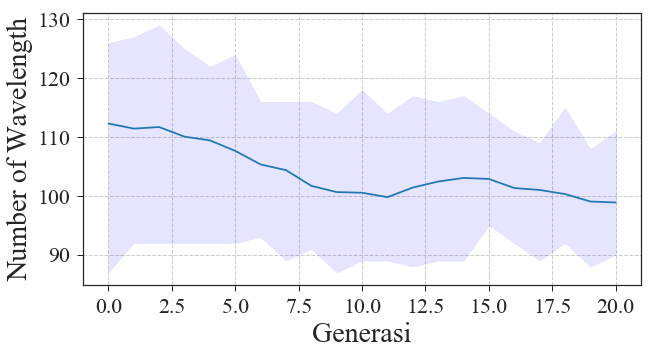

In [21]:
log_size = log_to_df(log.chapters['size'], 'Number of Wavelength')
plot_log(log_size, "Number of Wavelength", "Number of Wavelength", "Number of Wavelength")

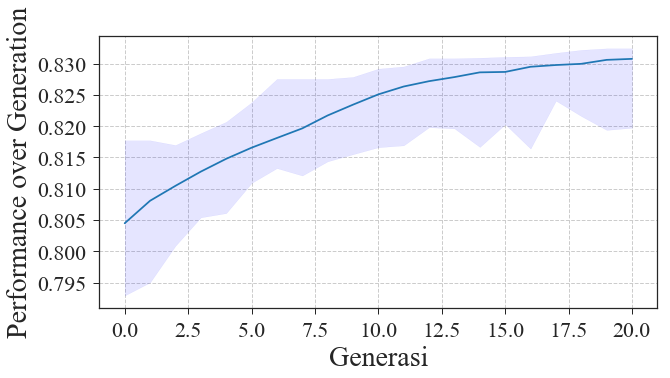

In [22]:
log_performance = log_to_df(log.chapters['fitness'],'Performance over Generation')
plot_log(log_performance, "Performance over Generation", "Performance over Generation", "Performance over Generation")